# This is first part trying to predict a winner using Support Vector machines

In [75]:
import numpy as np
import pandas as pd

In [76]:
# The following two dataframes contains the coaches information.
df_coaches_career = pd.read_csv('databasebasketball/coaches_career.txt')
df_coaches_season = pd.read_csv('databasebasketball/coaches_season.txt')

# The following contains indiidual player information and insite.
df_draft = pd.read_csv('databasebasketball/draft.txt') # --> Error {Performed some pre-processing}
df_player_allstar = pd.read_csv('databasebasketball/player_allstar.txt')
df_player_playoffs = pd.read_csv('databasebasketball/player_playoffs.txt')
df_player_playoffs_career = pd.read_csv('databasebasketball/player_playoffs_career.txt')
df_player_regular_season = pd.read_csv('databasebasketball/player_regular_season.txt')
df_player_regular_season_career = pd.read_csv('databasebasketball/player_regular_season_career.txt')
df_players = pd.read_csv('databasebasketball/players.txt')

# The following contains the teams data.
df_team_season = pd.read_csv('databasebasketball/team_season.txt')
df_teams = pd.read_csv('databasebasketball/teams.txt')

## Since certain matrix we available after 1970s our data start from that particular year

For example:
<b>Steals</b>, <b>blocks</b> and <b>turnovers</b> were not official nba stats until the 70's. Those 
stats are listed as zero for earlier season.

In [77]:
# The following two dataframes contains the coaches information.
# df_coaches_career = df_coaches_career.loc[df_coaches_career.year >= 1970]
df_coaches_season = df_coaches_season.loc[df_coaches_season.year >= 1970]

# # The following contains indiidual player information and insite.
# df_draft = df_draft.loc[df_draft.year >= '1970']
df_player_allstar = df_player_allstar.loc[df_player_allstar.year >= 1970]
df_player_playoffs = df_player_playoffs.loc[df_player_playoffs.year >= 1970] 
#df_player_playoffs_career = df_player_playoffs_career.loc[df_player_playoffs_career.year >= 1970]
df_player_regular_season = df_player_regular_season.loc[df_player_regular_season.year >= 1970]
#df_player_regular_season_career = df_player_regular_season_career.loc[df_player_regular_season_career.year >= 1970]
df_players = df_players.loc[df_players.firstseason >= 1970]

# # The following contains the teams data.
df_team_season = df_team_season.loc[df_team_season.year >= 1970]
# df_teams = df_teams.loc[df_teams.year >= 1970]

In [78]:
# len(df_player_regular_season.columns)
df_player_regular_season.head()

# drop certains columns in our data.
df = df_player_regular_season.drop(columns=['ilkid', 'year','firstname', 'lastname', 'team', 'leag', 'minutes', 'tpa', 'tpm'])
df.dtypes

df_team_season.year.max()

2004

In [79]:
# Perform some data preprocessing

season_team_stat = df_team_season.drop(columns=['team', 'year', 'leag', 'pace'])
teams = df_team_season['team']

import math

def win_to_loss(won, loss):
    return math.floor((won / (won + loss) * 100))

# added the target column in season_team_stat
season_team_stat['win_loss_percent'] = season_team_stat.apply(lambda x: win_to_loss(x.won, x.lost), axis=1)

In [80]:
import math
season_team_stat['win_loss_percent'] = season_team_stat['win_loss_percent']/100

In [81]:
def round_my_value(val):
    return int(round(x))

season_team_stat['win_loss_percent'] = season_team_stat['win_loss_percent'].round()

## Train our a model using Support Vector Machine

In [82]:
import numpy as np
from sklearn import svm

X_input = season_team_stat.drop(columns=['won', 'lost', 'win_loss_percent'])
Y_input = season_team_stat['win_loss_percent']

clf = svm.SVC()

In [83]:
# fit out model
fitted_model  = clf.fit(X_input, Y_input)

## Let us try testing the model

In [84]:
import random as rd

# guess1 = rd.randint(0,len(teams))
# guess2 = rd.randint(0,len(teams))

guess1 = 272
guess2 = 500

team1 = season_team_stat.iloc[guess1].drop(['won','lost','win_loss_percent'])
team2 = season_team_stat.iloc[guess2].drop(['won','lost','win_loss_percent'])

In [85]:
pred_team1 = fitted_model.predict([team1])
pred_team1

array([0.])

In [86]:
pred_team2 = fitted_model.predict([team2])

In [87]:
if pred_team1 > pred_team2:
    print(f'The following team is predicted to win: {teams[guess1]}')
else:
    print(f'The following team is predicted to win: {teams[guess1]}')

The following team is predicted to win: ATL


## Plot our confusion matrix

Confusion matrix, without normalization
[[356  86]
 [ 35 438]]


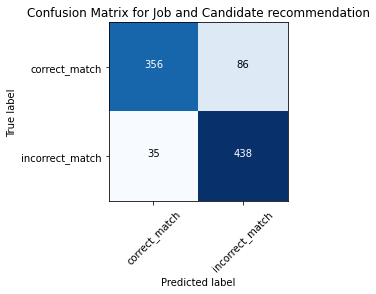

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85       442
         1.0       0.84      0.93      0.88       473

    accuracy                           0.87       915
   macro avg       0.87      0.87      0.87       915
weighted avg       0.87      0.87      0.87       915



In [96]:
# True y values and predicted values.
y_true = season_team_stat['win_loss_percent']
y_pred = fitted_model.predict(X_input)

# Create a confusion matrix to gauge the accuracy of our model.
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# confusion matrix.
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)


# function to plot our confusion metrics copied from sktlearn.
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion metrix.
    Normalization can be applied by by setting normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# plot are confusion matrix.
cm_plot_labels = ['correct_match', 'incorrect_match']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix for Job and Candidate recommendation')

# calculate some import component from our matrix.
"""
Precision,
Recall,
f1-score,
support
"""
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))